# Clase 4: Flujos de ML, Naive Bayes y SVM
### Diplomado en Data Science UC 2022

---

Las próximas semanas estudiaremos distintas técnicas de Machine Learning. Esta clase, estudiaremos una serie de técnicas que son transversales para todos los procesos de creación y evaluación de un **modelo**. Además, conoceremos la implementación de los modelos Naive Bayes y Support Vector Machine.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Set de entrenamiento y prueba

Los algoritmos de machine learning se caracterizan por procesar un conjunto de datos, extraer patrones de ellos y luego extrapolar esos patrones a situaciones a las que no ha sido expuesto en el pasado. Para evaluar la efectividad de este proceso necesitamos simular esas dos etapas: entrenamiento y validación.
- En la etapa de entrenamiento usamos la mayoría de los datos (comunmente entre un 70%-90%) para definir el preprocesamiento necesario (imputar, escalar, features sintéticas, etc) y entrenar.
- En la etapa de validación usamos sobre la fracción restante de los datos los procedimientos de preprocesamiento definidos en la etapa anterior (de manera **ciega**). Luego realizamos las predicciones y comparamos los resultados obtenidos con el valor real.

Scikit-learn Será una librería tan usada como Pandas, puesto que muchas herramientas de modelación se encuentran en ella. Utilizaremos una función específica para lo anteriormente expuesto llamada `train_test_split` que realizará una separación aleatoria en una fracción especificada.

In [2]:
np.random.seed(2022)
df = pd.DataFrame(data=np.random.rand(10, 3), columns=["x1", "x2", "x3"])
df["y"] = (
    2 * df["x1"] - 3.5 * df["x2"] - 2 * df["x3"] + np.random.normal(size=10, scale=0.1)
)
display(df)

,x1,x2,x3,y
0,0.009359,0.499058,0.113384,-2.148843
1,0.049974,0.685408,0.486988,-3.189590
2,0.897657,0.647452,0.896963,-2.321416
3,0.721135,0.831353,0.827568,-3.005155
4,0.833580,0.957044,0.368044,-2.386678
5,0.494838,0.339509,0.619429,-1.418380
6,0.977530,0.096433,0.744206,0.166058
7,0.292499,0.298675,0.752473,-1.975427
8,0.018664,0.523737,0.864436,-3.618806
9,0.388843,0.212192,0.475181,-1.055761


In [3]:
from sklearn.model_selection import train_test_split

X = df[["x1", "x2", "x3"]]  # Predictores
y = df["y"]                 # Variable respuesta

print("Predictores:")
display(X)
print("Variable respuesta:")
display(y)

# Separo en 70% entrenamiento y 30% testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)
print("Dimensiones X_train:", X_train.shape)
print("Dimensiones X_test :", X_test.shape)
print("Dimensiones y_train:", y_train.shape)
print("Dimensiones y_test :", y_test.shape)

Predictores:


,x1,x2,x3
0,0.009359,0.499058,0.113384
1,0.049974,0.685408,0.486988
2,0.897657,0.647452,0.896963
3,0.721135,0.831353,0.827568
4,0.833580,0.957044,0.368044
5,0.494838,0.339509,0.619429
6,0.977530,0.096433,0.744206
7,0.292499,0.298675,0.752473
8,0.018664,0.523737,0.864436
9,0.388843,0.212192,0.475181


Variable respuesta:


0   -2.148843
1   -3.189590
2   -2.321416
3   -3.005155
4   -2.386678
5   -1.418380
6    0.166058
7   -1.975427
8   -3.618806
9   -1.055761
Name: y, dtype: float64

Dimensiones X_train: (7, 3)
Dimensiones X_test : (3, 3)
Dimensiones y_train: (7,)
Dimensiones y_test : (3,)


Si desea generar datos de entrenamiento y prueba con datos de carácter secuencial como las series de tiempo, es necesario agregar el argumento `shuffle=False` a la función `train_test_split` para mantener el orden de los datos.

## Introducción a Scikit-Learn

Documentación: <https://scikit-learn.org/stable/user_guide.html>.

Si bien ya hemos usado algunas funciones de Scikit-Learn para separar datos en entrenamiento y testeo, el corazón de esta librería son todas las funcionalidades que existen desde el preprocesamiento de datos hasta la validación de los modelos.

Scikit-Learn es una librería cuya característica principal es el orden. Las funcionalidades que mantienen características en común están ubicadas en módulos distintos dentro de esta librería.

Uno de los aspectos que hace que Scikit-Learn sea tan querido, es que su forma de uso es bastante estándar independiente de la funcionalidad que estémos usando. Veamos algunos ejemplos.

### Modelo de Regresión Lineal

In [4]:
from sklearn.linear_model import LinearRegression

# Instanciamos funcionalidad
modelo = LinearRegression()
# Ajustamos modelo con datos de entrenamiento
modelo.fit(X_train, y_train)
# Vemos métrica en testeo
print("R^2:", modelo.score(X_test, y_test))
# Generamos predicciones
predicciones = modelo.predict(X_test)

R^2: 0.9724287947118486


### Árbol de Decisión

In [5]:
from sklearn.tree import DecisionTreeRegressor

# Instanciamos funcionalidad
modelo = DecisionTreeRegressor()
# Ajustamos modelo con datos de entrenamiento
modelo.fit(X_train, y_train)
# Vemos métrica en testeo
print("R^2:", modelo.score(X_test, y_test))
# Generamos predicciones
predicciones = modelo.predict(X_test)

R^2: -0.8405647388592965


¡Y será bastante similar con los modelos y técnicas que vayamos aprendiendo!



## Feature engineering

Los datos, tal y como son recolectados, rara vez están en un una forma efectiva para el aprendizaje del modelo. Además del proceso de limpieza normal de una base de datos, existe una serie de transformaciones que mejoran el performance de las predicciones.

### Scaling

Muchos algoritmos de Machine Learning se benefician de que las features de entrada tengan valores de tamaño similar y que dichos valores no sean extremos. Dos transformaciones comunes son:
- Normalización: consiste en llevar todos los valores de una columna al rango [0, 1]. Para esto se aplica la transformación

$$
x = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

- Estandarización: consiste en transformar los datos de manera que estén centrados y relativamente concentrados en cero. Hacemos esto forzando que su media sea 0 y varianza 1 usando la siguiente transformación:
$$
x = \frac{x - \mu}{\sigma}
$$
En `scikit-learn` usamos



In [6]:
# Datos originales
x = np.random.gamma(shape=2, scale=10, size=(1000, 1))

# Datos Normalizados
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()      # instanciamos
norm.fit(x)                # aprendemos sobre x
x_norm = norm.transform(x) # aplicamos transformación a x

# Datos Estandarizados
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()      # instanciamos 
stand.fit(x)                  # aprendemos sobre x
x_stand = stand.transform(x)  # aplicamos transformación a x

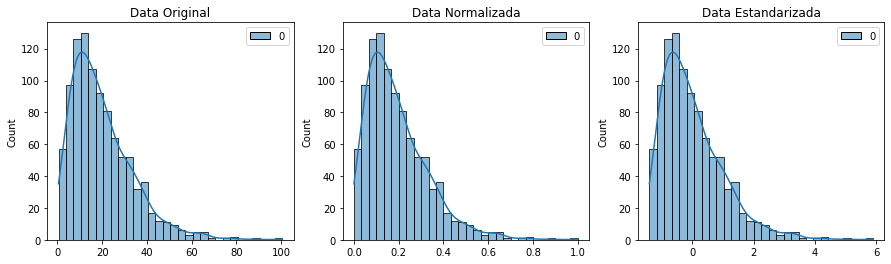

In [7]:
# Gráficos
fig, ax = plt.subplots(ncols=3, figsize=(15,4))
# Originales
sns.histplot(x, ax=ax[0],kde=True)
ax[0].set_title('Data Original')
# Normalizados
sns.histplot(x_norm, ax=ax[1],kde=True)
ax[1].set_title('Data Normalizada')
# Estandarizaods
sns.histplot(x_stand, ax=ax[2],kde=True)
ax[2].set_title('Data Estandarizada');

### One hot encoding o variables dummy

Los algoritmos de Machine Learning, en la práctica, son operaciones matemáticas y como tales operan sobre números. Qué pasa cuando tenemos una variable como `ciudad` en el conjunto de datos? Tenemos que encontrar una estrategia para representar dichos *conceptos* como números. En general, esas estrategias se llaman embeddings y cumplen un rol extremadamente importante en aplicaciones de Procesamiento de Lenguaje Natural. En nuestro caso, usaremos la alternativa mas sencilla, llamada One-Hot Encoding o variables dummy. Consiste en representar una variable con N categorías como N vectores, cuyas coordenadas son todas cero salvo una, que identifica a qué categoría pertenece.

In [8]:
ciudades = pd.DataFrame(np.random.choice(['Santiago', 'Coquimbo', 'Temuco'], size=10), columns=['Ciudad'])
print("Data original:")
display(ciudades)

from sklearn.preprocessing import OneHotEncoder

print("Luego de One Hot Encoding:")
ohe = OneHotEncoder(sparse=False)
ohe.fit(ciudades)
ciudades_one_hot = ohe.transform(ciudades)

pd.DataFrame(ciudades_one_hot, columns=ohe.get_feature_names_out())

Data original:


,Ciudad
0,Temuco
1,Coquimbo
2,Santiago
3,Santiago
4,Santiago
5,Temuco
6,Coquimbo
7,Temuco
8,Santiago
9,Coquimbo


Luego de One Hot Encoding:


,Ciudad_Coquimbo,Ciudad_Santiago,Ciudad_Temuco
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,0.0,1.0
6,1.0,0.0,0.0
7,0.0,0.0,1.0
8,0.0,1.0,0.0
9,1.0,0.0,0.0


## Métricas de desempeño

Como vimos anteriormente, el método `score` nos entrega el $R^2$ si estamos realizando un modelo de regresión, y el _accuracy_ (o tasa de clasificación correcta) si nuestro modelo es de clasificación.

A continuación, aprenderemos a implementar otras técnicas de evaluación del desempeño de nuestros modelos. 

In [9]:
#Creemos datos de prueba
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples            = 1000,
    n_features           = 2,
    n_informative        = 2,
    n_redundant          = 0,
    class_sep            = 1.5,
    n_clusters_per_class = 1,
    random_state         = 13
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)

print('Predictores:')
display(X[0:5])
print('Variable respuesta:')
display(y[0:5])

Predictores:


array([[-1.85572313,  1.43221634],
       [-1.94896628,  1.12828913],
       [-0.75934867, -0.29265799],
       [ 1.3152719 ,  0.29490409],
       [ 1.93019668,  1.84216989]])

Variable respuesta:


array([0, 0, 0, 1, 1])

In [10]:
# Entrenamos modelo:
from sklearn.naive_bayes import GaussianNB
modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)
y_pred = modelo_nb.predict(X_test)

### Matriz de confusión

Tabla:


Predicción,0,1
Observado,,
0,141,13
1,5,141


Gráfico:


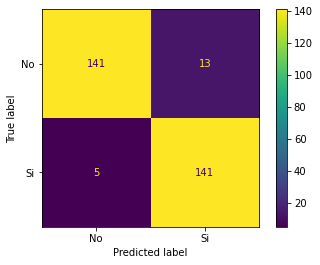

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

resultados = pd.DataFrame({"Observado": y_test, "Predicción": y_pred})
print("Tabla:")
tabla = pd.crosstab(resultados["Observado"], resultados["Predicción"])
display(tabla)
print("Gráfico:")
ConfusionMatrixDisplay.from_estimator(modelo_nb, X_test, y_test, display_labels=["No", "Si"]);

De la tabla anterior, podemos encontrar distintos cálculos usados como métricas de desemepeño bajo la definición que les da Scikit-Learn:

* **Accuracy**: Número de registros correctamente clasificados sobre el numero total de datos.
* **Precision** (Precisión): Indica el porcentaje de registros correctamente clasificados dentro de una clase. 
* **Recall** (Detección): Indica el porcentaje de registros de una clase que fueron detectados por el modelo.
* **F1**: Media armónica entre precisión y detección, es útil para datos desbalanceados ya que esta media penaliza valores muy bajos.


Todo lo respectivo a métricas se encuentra en el módulo `metrics` en `sklearn`:

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1       :", f1_score(y_test, y_pred))

Accuracy : 0.94
Precision: 0.9155844155844156
Recall   : 0.9657534246575342
F1       : 0.94


Resulta que este módulo también presenta la función `classification_report`, que reporta las medidas de accuracy, precision, recall y f1 para cada categoría en el modelo estimado.

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["No", "Si"]))

              precision    recall  f1-score   support

          No       0.97      0.92      0.94       154
          Si       0.92      0.97      0.94       146

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



### Receiving Operating Characteristics (Curva ROC)

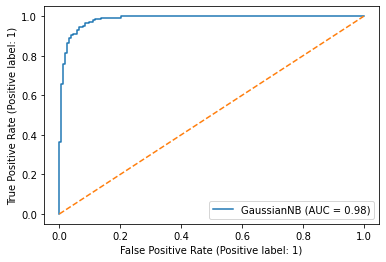

In [14]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(modelo_nb, X_test, y_test)
plt.plot([0, 1], ls="--");

Verán que es muy común (en especial en banca y consultoras) revisar el **área bajo la curva** del modelo, que es un número que rápidamente nos indicará la calidad de este. También podemos calcularlo de la siguiente manera:

In [15]:
from sklearn.metrics import roc_auc_score
print("Área bajo la curva:", roc_auc_score(y_test, y_pred))

Área bajo la curva: 0.940668920120975


## Diagnosticando un modelo

A continuación veremos algunos para evaluar nuestros modelos de forma robusta.

Si prestamos atención a nuestros resultados, el sesgo estimado impacta más al modelo que la varianza estimada. Sin embargo, al tener un error medio bajo dado el contexto, podemos despreciar esta diferencia.

### Cross Validation

Recordemos que entrenar y evaluar el modelo con el mismo conjunto de datos es un error metodológico, ya que nos arriesgamos a que el modelo **memorice** en vez de **aprender**. Atacamos este problema eligiendo un set de entrenamiento y uno de prueba.

Además, podemos probar distintas divisiones de entrenamiento y prueba para nuestros datos. Esto se denomina **validación cruzada** y consiste en repetir el proceso de entrenamiento una cantidad determinada de veces con distintos subconjuntos de datos. Cada entrenamiento produce una serie de métricas que podemos analizar como una muestra.

Podemos estimar el sesgo y varianza de nuestros modelos (sin incluir error intríseco) de nuestros modelos.

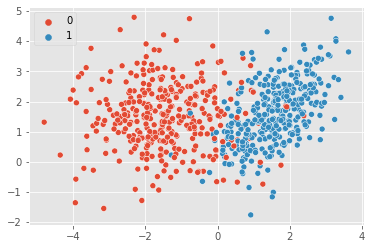

In [16]:
plt.style.use('ggplot')
np.random.seed(2022)

sns.scatterplot(
    x   = X_train[:, 0],
    y   = X_train[:, 1],
    hue = y_train
);

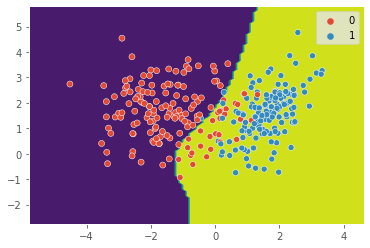

In [17]:
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

modelo = SVC(kernel="poly")
modelo.fit(X_train, y_train)

DecisionBoundaryDisplay.from_estimator(modelo, X_train, response_method="predict")
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test);

Calculamos sus medidas de error:

In [18]:
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.984     0.792     0.878       154
           1      0.818     0.986     0.894       146

    accuracy                          0.887       300
   macro avg      0.901     0.889     0.886       300
weighted avg      0.903     0.887     0.886       300



Si bien el modelo posee buenas métricas, podemos evaluar incialmente nuestro modelo con la técnica de validación cruzada K-Folds antes de obtener métricas de testeo.

Por ejemplo, pre-evaluemos nuestro modelo con validación cruzada de 10-Folds:
* Con la clase `KFold` establecemos configuraciones de la validación cruzada, como semilla y número de grupos.
* Con la función `cross_val_score` ejecutamos la validación cruzada, indicandole modelo, datos a usar, configuraciones de la validación cruzada y métrica a calcular.  




In [19]:
from sklearn.model_selection import KFold, cross_val_score

configuraciones = KFold(n_splits=10, shuffle=True, random_state=2022)
resultados = cross_val_score(
    estimator = modelo,
    X         = X_train,
    y         = y_train,
    cv        = configuraciones,
    scoring   = "accuracy"
)
print("- Accuracy en cada grupo:")
print(resultados)
print("- Accuracy en validación cruzada:", resultados.mean())

- Accuracy en cada grupo:
[0.95714286 0.9        0.9        0.91428571 0.9        0.92857143
 0.88571429 0.84285714 0.88571429 0.94285714]
- Accuracy en validación cruzada: 0.9057142857142859


El `accuracy` es distinto de acuerdo al grupo que se utiliza para calcularlo. Esta información es muy útil para obtener un accuracy más robusto respecto al que se usa considerando la totalidad de los datos.

### Optimización de hiperparámetros


A pesar de que nuestras métricas de validación cruzada nos dan indicio de que actualmente tenemos un buen modelo, aún no es el mejor kernel que asignar, por lo que para estos casos utilizaremos búsqueda de hiperparámetros. En términos simples, estos son valores que poseen los modelos que podemos cambiar, para obtener distintos resultados bajo los mismos modelos y la misma data. En las clases siguientes veremos algunos hiperparámetros para cada modelo.

La estrategia mas común para encontrar los mejores valores de un hiperparámetro es entrenar una serie de modelos, para distintos valores de hiperparámetros y elegir el que tiene mejores métricas. 

El problema surge cuando repetimos este proceso para el mismo set de entrenamiento y prueba. Existe el riesgo que terminemos eligiendo el mejor conjunto de hiperparámetros para una división específica de los datos. La solución es **validación cruzada**.

Esta nos permitirá probar distintos hiperparámetros (como el kernel) y entregar como resultado el mejor modelo dada la métrica seleccionada en validación cruzada. Para indicar los hiperparámetros a probar, debemos hacerlo mediante un diccionario y la llave de cada elemento debe coincidir con el de la función que inicializa el modelo.

Scikit-Learn nos provee distintas clases dentro del módulo `model_selection` para este fin como `GridSearchCV`, `RandomizedSearchCV` y `HalvingGridSearchCV`.

Otra librería bastante popular para estos fines y que usa un método que entrega mejores resultados en menos tiempo es `optuna`, pero inicialmente conozcamos la implementación dentro de `scikit-learn`.

In [20]:
from sklearn.model_selection import GridSearchCV, KFold

hiperparametros = {"kernel": ["rbf", "linear", "poly"]}
configuraciones = KFold(n_splits=10, shuffle=True, random_state=2022)
modelo          = SVC(random_state=2022)

modelos = GridSearchCV(
    estimator  = modelo,           # modelo a optimizar
    param_grid = hiperparametros,  # Parámetros donde buscar
    cv         = configuraciones,  # configuraciones validación cruzada
    scoring    = "accuracy",       # Buscamos optimizar el accuracy
    n_jobs     = -1,               # Para usar todos los nucleos
    verbose    = 1                 # Para saber cuantos modelos estamos ajustando.
)
modelos.fit(X_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2022, shuffle=True),
             estimator=SVC(random_state=2022), n_jobs=-1,
             param_grid={'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy', verbose=1)

Veamos los resultados:

In [21]:
tabla_resultados = pd.DataFrame(modelos.cv_results_)[["params", "mean_test_score", "rank_test_score"]]
tabla_resultados.style.bar("mean_test_score")

,params,mean_test_score,rank_test_score
0,{'kernel': 'rbf'},0.941429,2
1,{'kernel': 'linear'},0.948571,1
2,{'kernel': 'poly'},0.905714,3


El modelo con mejores resultados es el que tiene un accuracy medio superior al resto, y en este caso es el que usa kernel lineal. `GridSearchCV` automáticamente almacena el modelo con mejor resultado dentro de la propiedad `best_estimator_` y ahora está listo para entrenar con datos de entrenamiento y ser evaluado con el set de testeo.

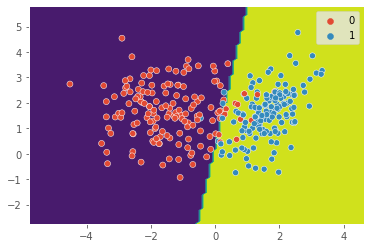

In [22]:
mejor_modelo = modelos.best_estimator_.fit(X_train, y_train)

DecisionBoundaryDisplay.from_estimator(mejor_modelo, X_train, response_method="predict")
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test);

In [23]:
y_pred_train = mejor_modelo.predict(X_train)
y_pred_test  = mejor_modelo.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88       154
           1       0.82      0.99      0.89       146

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300



### Underfitting y Overfitting

Un modelo es exitoso cuando es capaz de igualar la complejidad del problema que está representando. Cuando proponemos un modelo muy sencillo para un problema muy complicado, no importa con cuantos datos alimentemos el modelo, nunca logrará ajustarse. Este escenario es conocido como **underfitting** y ocurre cuando nuestro modelo no es tan complejo como nuestro problema y tiene un sesgo alto. El caso contrario, conocido como **overfitting** ocurre cuando nuestro modelo es mas complejo que nuestro problema y tiene varianza alta. Esto permite que el modelo aprenda incluso el ruido presente en los datos y por lo tanto no pueda generalizar bien. 

Veamos como estimar el sesgo y varianza de nuestros modelos:

In [24]:
# !pip install mlxtend
from mlxtend.evaluate import bias_variance_decomp
error_medio, sesgo_medio, varianza_media = bias_variance_decomp(
    estimator   = modelo_nb,
    X_train     = X_train,
    X_test      = X_test,
    y_train     = y_train,
    y_test      = y_test,
    random_seed = 2022
)
print("Error medio   :", error_medio)
print("Sesgo medio   :", sesgo_medio)
print("Varianza media:", varianza_media)

Error medio   : 0.06361666666666667
Sesgo medio   : 0.06
Varianza media: 0.008483333333333332


Otra forma de identificar estos problemas es comprarar el comportamiento del modelo en el set de entrenamiento vs prueba, recordando que:

- **Underfitting** se caracteriza por que ambas métricas no alcanzan un valor deseable
- **Overfitting** se caracteriza por presentar un gap entre el score de entrenamiento y prueba. El score de entrenamiento es bueno mientras que el de prueba se estanca o empeora
- **Ideal** Ambas métricas convergen a un valor deseable

In [25]:
print("Train accuracy:", accuracy_score(y_train, y_pred_train))
print("Test accuracy:", accuracy_score(y_test, y_pred_test))

Train accuracy: 0.9485714285714286
Test accuracy: 0.9466666666666667


## Ejercicios

La base de datos Credit contiene datos de clientes de un banco e información sobre su situación financiera. Las variables son las siguientes:
    
    
- Income : Ingreso anual disponible en miles de dólares.
- Limit : Límite del crédito.
- Rating : Ranking del crédito.
- Cards : Cantidad de tarjetas de credito.
- Age : Edad del usuario.
- Education : Años de educación del usuario.
- Gender : ¿Hombre o mujer?
- Student : ¿Es estudiante?
- Married : ¿Está casado?
- DebtLevel (Variable Respuesta) : El nivel de deuda es aceptable (0) o alto (1).

**a)**  Cargue los datos y obtenga un resumen descriptivo de estos con el método `describe`.

In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/DiegoHoliwis/Diplomado_DS/main/Bases_Python/credito.csv")
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,DebtLevel
0,14.891,3606,283,2,34,11,Male,No,Yes,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,1
2,104.593,7075,514,4,71,11,Male,No,No,1
3,148.924,9504,681,3,36,11,Female,No,No,1
4,55.882,4897,357,2,68,16,Male,No,Yes,0


In [ ]:
df.describe()

In [ ]:
df.describe(include=["object"])

**b)** Determine qué variables de la  base de datos corresponden a categorías.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   DebtLevel  400 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 31.4+ KB


Las variables que son categorías son:
- Gender
- Student
- Married

Por lo tanto deben recodificarse a números con una serie de variables dummies.

**Ahora preprocese los datos siguiendo los siguientes pasos:**

**b.1)** Defina los objetos df_num y df_cat donde estén solo los predictores numéricos y categóricos respectivamente. Guarde la variable `DebtLevel` en un objeto aparte.

In [28]:
df_num = df[df.columns[df.dtypes != "object"]].iloc[:, :-1]
df_cat = df[df.columns[df.dtypes == "object"]]
y = df["DebtLevel"]


**b.2)** Recodifique todas las variables categóricas. Para recodificar las variables categóricas, puede utilizar la clase `OneHotEncoder` de Scikit-Learn indicando los argumentos `sparse=False` y `drop="first"`, ajuste esta con la base de datos de variables categóricas. Luego cree el objeto `df_one_hot` que es una nueva base de datos con las variables categóricas pero dummificadas.

In [29]:
one_hot = OneHotEncoder(sparse=False, drop="first")
one_hot.fit(df_cat)
df_one_hot = pd.DataFrame(one_hot.transform(df_cat), columns=one_hot.get_feature_names_out())
df_one_hot.head()

,Gender_Female,Student_Yes,Married_Yes
0,0.0,0.0,1.0
1,1.0,1.0,1.0
2,0.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


**b.3)** Realice un proceso similar para estandarizar las variables numéricas, guarde el resultado en el objeto `df_num_std`.

In [30]:
estand = StandardScaler()
estand.fit(df_num)
df_num_std = pd.DataFrame(estand.transform(df_num), columns=estand.get_feature_names_out())
df_num_std.head()

,Income,Limit,Rating,Cards,Age,Education
0,-0.861583,-0.489999,-0.465539,-0.699130,-1.257674,-0.784930
1,1.727437,0.828261,0.828703,0.031032,1.528451,0.496588
2,1.686756,1.014787,1.029311,0.761194,0.889964,-0.784930
3,2.946152,2.068440,2.110003,0.031032,-1.141586,-0.784930
4,0.302928,0.070012,0.013331,-0.699130,0.715831,0.816968


**b.3)** Junte el objeto `df_num` con `df_one_hot` usando la función de pandas `concat([df_num, df_one_hot], axis=1)`, de modo que en un objeto `X` se encuentren todas las variables.

In [31]:
X = pd.concat([df_num_std, df_one_hot], axis=1)
X.head()

,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Student_Yes,Married_Yes
0,-0.861583,-0.489999,-0.465539,-0.699130,-1.257674,-0.784930,0.0,0.0,1.0
1,1.727437,0.828261,0.828703,0.031032,1.528451,0.496588,1.0,1.0,1.0
2,1.686756,1.014787,1.029311,0.761194,0.889964,-0.784930,0.0,0.0,0.0
3,2.946152,2.068440,2.110003,0.031032,-1.141586,-0.784930,1.0,0.0,0.0
4,0.302928,0.070012,0.013331,-0.699130,0.715831,0.816968,0.0,0.0,1.0


**c)** Defina sets de entrenamiento y testeo con un porcentaje de datos de entrenamiento del 75%.

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2022)

**d)** Entrene un Support Vector Machine con kernel gaussiano (`kernel="rbf"`) en los datos de entrenamiento. Obtenga el accuracy de validación cruzada con la estratregia de 5-Folds (recuerde que esto se lleva a cabo con la función `cross_val_score`, la clase `KFold` y con los datos de entrenamiento).

In [33]:
from sklearn.svm import SVC

model = SVC(kernel="rbf")

resultados = cross_val_score(
    estimator = model,
    X         = X_train,
    y         = y_train,
    cv        = KFold(n_splits=5, shuffle=True, random_state=2022),
    scoring   = "accuracy"
)
print("Accuracy en CV:", resultados.mean())

Accuracy en CV: 0.9433333333333331


**e)** Mediante validación cruzada, encuentre el kernel y variables slack que máximicen el `F1`. A continuación, se propone una grilla de valores posibles.

```python
parametros = {
    "kernel": ["rbf", "linear", "poly"],
    "C"     : np.logspace(-3, 1, 10) # variables slack
}
```

In [34]:
parametros = {
    "kernel": ["rbf", "linear", "poly"],
    "C"     : np.logspace(-3, 1, 20) 
}
modelos = GridSearchCV(
    estimator  = model,
    param_grid = parametros,
    cv         = KFold(n_splits=5, shuffle=True, random_state=2022),
    scoring    = "f1",
    n_jobs     = -1,
    verbose    = 1
)
modelos.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 1.62377674e-03, 2.63665090e-03, 4.28133240e-03,
       6.95192796e-03, 1.12883789e-02, 1.83298071e-02, 2.97635144e-02,
       4.83293024e-02, 7.84759970e-02, 1.27427499e-01, 2.06913808e-01,
       3.35981829e-01, 5.45559478e-01, 8.85866790e-01, 1.43844989e+00,
       2.33572147e+00, 3.79269019e+00, 6.15848211e+00, 1.00000000e+01]),
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='f1', verbose=1)

In [35]:
tabla_resultados = pd.DataFrame(modelos.cv_results_)[["params", "mean_test_score", "rank_test_score"]]
tabla_resultados.sort_values("rank_test_score").style.bar("mean_test_score")

,params,mean_test_score,rank_test_score
46,"{'C': 1.438449888287663, 'kernel': 'linear'}",0.968856,1
40,"{'C': 0.5455594781168515, 'kernel': 'linear'}",0.966049,2
43,"{'C': 0.8858667904100823, 'kernel': 'linear'}",0.966049,2
55,"{'C': 6.158482110660261, 'kernel': 'linear'}",0.965596,4
49,"{'C': 2.3357214690901213, 'kernel': 'linear'}",0.965468,5
37,"{'C': 0.3359818286283781, 'kernel': 'linear'}",0.962543,6
58,"{'C': 10.0, 'kernel': 'linear'}",0.961962,7
52,"{'C': 3.792690190732246, 'kernel': 'linear'}",0.958196,8
31,"{'C': 0.12742749857031335, 'kernel': 'linear'}",0.955709,9
34,"{'C': 0.20691380811147903, 'kernel': 'linear'}",0.955270,10


**f)** Con el mejor modelo, obtenga la matriz de confusión y reporte de clasificación en los datos de testeo. Comente comparativamente con los resultados anteriores ¿Hay evidencias de overfitting o underfitting?

              precision    recall  f1-score   support

           0      1.000     0.942     0.970        52
           1      0.941     1.000     0.970        48

    accuracy                          0.970       100
   macro avg      0.971     0.971     0.970       100
weighted avg      0.972     0.970     0.970       100



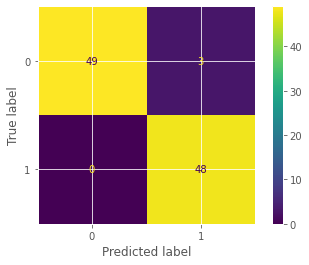

In [36]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

mejor_modelo = modelos.best_estimator_.fit(X_train, y_train)
y_pred = mejor_modelo.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))
ConfusionMatrixDisplay.from_estimator(mejor_modelo, X_test, y_test);

In [38]:
error_medio, sesgo_medio, varianza_media = bias_variance_decomp(
    estimator   = mejor_modelo,
    X_train     = X_train.values,
    X_test      = X_test.values,
    y_train     = y_train.values,
    y_test      = y_test.values,
    random_seed = 2022
)
print("Error medio   :", error_medio)
print("Sesgo medio   :", sesgo_medio)
print("Varianza media:", varianza_media)

Error medio   : 0.033049999999999996
Sesgo medio   : 0.03
Varianza media: 0.02015


Notemos que el F1 de testeo es muy parecido al de validación cruzada, además es un valor aceptable. Esto indica que al parecer no hay problemas de overfitting ni underfitting. Esto se confirma también estimando sesgo y varianza.